[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/prokaj/elte-python/blob/main/7-gyakorlat.ipynb)

## Házi feladatok


1. Írjunk egy függvényt, aminek két paramétere van egy string-ekből álló lista és pozitív egész küszöbérték. A függvény visszatérési értéke azon karakterek listája, amelyek legalább a küszöbértékben megadott számú sztringben előfordulnak.

   Pl. ha a függvényünk neve `frequent_chars`, akkor

   ```
   frequent_chars(["alma", "malna","golya"], 3)
   ```
   
   értéke `["a","l"]`. Ha a küszöbérték három helyett kettő lenne, akkor még az `"m"` is bekerülne a listába.
   
   A visszaadott lista legyen sorba rendezve. Lássuk el a függvényt típus annotációval, írjunk hozzá `docstring`-et (magyarul vagy angolul, ahogy kényelmesebb).
   
   Írjunk teszt függvényt, ami ellenőrzi, legalább az alábbi esetkre ellenőrzi a helyes működést:
   
   - Az eredmény nem függ a stringek sorrendjétől az argumentumként kapott listában.
   
   - A stringek listája üres.
   
   - Véletlenszerű stringekből álló lista.
   
   - Ugyanaz a string ismétlődik sokszor.



- Van-e olyan adatszerkezet, ami kiszűri az ismétlődéseket?
- Van-e olyan osztály, ami megszámolja az ismétlődéseket? 

In [220]:
def frequent_chars(lst: list, n: int) -> list:
    """
    Parameters:

    lst: list of strings
    n: threshold

    Return value:

    The list of those characters, in alphabetical order, that are in at least n strings in lst.    
    """
    pass

A teszteléshez, **Jupyteres környezet**ben, az `ipytest` csomag kényelmes. 

In [ ]:
try:
    import ipytest
    ipytest.autoconfig()
    
except ModuleNotFoundError:
    print("Trying to install ipytest")
    ! pip install ipytest --quiet
    print("Try again!")

In [ ]:
%%ipytest
from itertools import permutations


def test_frequent_chars():
    lst = ["alma", "golya", "malna"]
    for lst1 in permutations(lst):
        assert frequent_chars(lst, 2) == frequent_chars(lst1, 2)
    
    assert frequent_chars([], 1) == []

    assert frequent_chars(["adgwro", "adgget", "adgw", "weti"], 2) == ["a", "d", "e", "g", "t", "w"]

    assert frequent_chars(["alma"]*5, 6) = []

    assert frequent_chars(["alma"]*5, 4) = ["a", "l", "m"]
    
    assert frequent_chars(["alma"]*5, 5) = ["a", "l", "m"]



2. Írjunk egy függvényt, ami egy sorozatból kigyűjti az különböző elemeket és mindegyikhez feljegyzi hol fordulnak elő. Feltehető, hogy a sorozat elemei használhatóak kulcsként egy szótárban.

   Pl. Ha függvény neve collect_positions, akkor
   
   ```
   collect_positions("ababcda")
   ```

   hívás eredménye:
   
   ```
   {"a": [0, 2, 6], "b":[1, 3], "c": [4], "d": [5]}
   ```

   A visszaadott szótárban az értékek legyenek nagyságszerinti sorba rendezve. Lássuk el a függvényt típus annotációval, írjunk hozzá docstring-et (magyarul vagy angolul, ahogy kényelmesebb).
   
   Írjunk teszt függvényt, ami ellenőrzi, legalább az alábbi esetkre ellenőrzi a helyes működést:
   
   - Az argumentum legalább 10 hosszú string
   
   - Az argumentum stringek legalább 10 hosszú listája.
   
   - Az argumentum map hivás eredménye, pl. ha az előző pontban használt lista `lst`, akkor `map(str.upper, lst)`, vagy `map(str.lower, lst)`
   
   - A sorozat üres.
   
   A megoldásban jól jöhet az `enumerate` függvény


In [221]:
from typing import Sequence

def collect_positions(seq: Sequence) -> dict:
    """
    Returns for each element in seq the list of occurences.
    """
    
    pass

In [ ]:
%%ipytest

def test_collect_positions():
    assert collect_positions("ababcda") == {"a": [0, 2, 6], "b":[1, 3], "c": [4], "d": [5]}
    assert collect_positions(["alma", "körte"]) == {"alma":[0], "körte":[1]}
    assert collect_positions(map(str.upper, ["alma", "körte"])) == {"ALMA":[0], "KÖRTE":[1]}
    assert collect_positions([]) == {}

    

## Feladat előadásról

Adva van egy szövegfile. [P0022.txt](https://eltehu.sharepoint.com/:t:/s/Crs22-23-1bevtudprogm22ea1Bevezetsatudomnyosprogramozsbaelad/EcraA_ZkX4VGpoCn4mzaCCcBlKbsnmDqrm_EejiXr7-57g?e=BhFq1M)

Ebben a fájlban keresztnevek vannak. Hány olyan lényegében különböző névpár van, hogy a pár második eleme az első névnek a megfordítottja?

pl. ("NORA", "ARON")


Az ("ARON", "NORA") pár nem különbözik lényegében az előzőtől.

A nevek kezdőbetűit tekintve melyik az 5 leggyakoribb? W-vel vagy C-vel kezdődik több név?

In [2]:
import urllib.request as request

url = "https://eltehu.sharepoint.com/:t:/s/Crs22-23-1bevtudprogm22ea1Bevezetsatudomnyosprogramozsbaelad/EcraA_ZkX4VGpoCn4mzaCCcBlKbsnmDqrm_EejiXr7-57g?e=BhFq1M"
try:
    request.urlretrieve(url, "P0022_names.txt")

except request.HTTPError:
    print("Download manually!")


Download manually!


Alternatíva:

- https://www.gutenberg.org/files/3201/files/NAMES.TXT
- https://github.com/dominictarr/random-name/raw/master/names.txt

1993-as gyűjtemény GB és US nevekből, részletesen [itt](https://www.gutenberg.org/ebooks/3201)

In [37]:
url = "https://github.com/dominictarr/random-name/raw/master/names.txt"

try:
    request.urlretrieve(url, "P0022_names.txt")

except request.HTTPError:
    print("Download manually!")


In [38]:
with open("./P0022_names.txt") as f:
    names = [line.strip().upper() for line in f]

len(names)

21985

In [39]:
[name for name in names if not name.isascii()]


[]

In [40]:
from itertools import combinations

Párok brute force-szal.

In [43]:
%%time
pairs = [(a,b) for a, b in combinations(names, 2) if a[::-1]==b] + [(a,a) for a in names if a==a[::-1]]
len(pairs)

CPU times: user 22.1 s, sys: 0 ns, total: 22.1 s
Wall time: 22.1 s


191

In [42]:
%%time
A = set(names)
pairs = [(x, x[::-1]) for x in names if x<=x[::-1] and x[::-1] in A]
len(pairs)

CPU times: user 8.73 ms, sys: 0 ns, total: 8.73 ms
Wall time: 8.42 ms


191

In [44]:
from collections import Counter

counter = Counter(x[0] for x in names)
counter.most_common(5)

[('S', 1763), ('M', 1691), ('C', 1602), ('A', 1544), ('B', 1541)]

## Újabb feladat előadásról

Adott egy kifejezés, ami a `(`, `)`, `[` és `]` karakterekből állhat. Állapítsuk meg, hogy a kifejezés helyesen zárójelezett-e vagy sem.

pl. `([()])` helyes zárójelezés, `([(]))` nem az, mert a szögletes zárójelpár tartalmaz pár nélküli nyitó zárójelet.

Próbáljuk megoldani stack-kel (listával).

In [ ]:
pairs = "()[]{}"
opening = pairs[::2]
closing = pairs[1::2]
closing_symbols = dict(zip(closing, opening))

def is_balanced(string):
    stack = []
    for x in string:
        if x in opening:
            stack.append(x)
        else:
            if ???:
                return False
    return ???

In [ ]:
opening, closing, closing_symbols

In [ ]:
%%ipytest

def test_is_balanced():
    assert is_balanced("[([(()[]())])]") == True
    assert is_balanced("[[))") == False
    assert is_balanced("") == True
    assert is_balanced("[") == False

## Mi történik a `with` statement alkalmazásakor?

### Mit lehet a with mögé írni?

Hasonlóan a `for`-hoz szinte bármit, aminek van két metódusa:

- `__enter__`
- `__exit__`


    with obj as x:
       do_something with x

Itt az `obj.__enter__()` hívás eredménye lesz az x értéke és a block végén **GARANTÁLTAN** végrehajtódik az `obj.__exit__(...)` hívás.
Az `__enter__` metódus végezheti az előkészítést, az `__exit__` a takarítást!

#### Kell-e nekünk ezeket a metódusokat közvetlenül implementálni?

Valójában nem. Elegendő egy generátor függvényt megírni:

    import time
    
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
            

Így még csak egy generátort kapunk ami egyszer visszaad semmit (`None`) majd jelzi, hogy vége van a sorozatnak. 

Próbáljuk ki `for`-ral

In [ ]:
import time
    
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")
        
for x in timer():
    print(x)

`with`-del hibát kapunk

In [ ]:
with timer() as x:
    print(x)

A `contextlib` module `contextmanager` függvénye generátorból `contextmanager`-t készít.

In [ ]:
from contextlib import contextmanager
timer2 = contextmanager(timer)
with timer2() as x:
    print(x)

Ha egy függvény akarunk alkalmazni egy függvényre, hogy azt átalakítsuk, de ugyanaz maradjon a neve akkor a python `@` szintakszist használja. Ilyenkor ,,dekoráljuk'' a függvényt. A `contextmanager` egy példa **dekorátor**ra.

    @contextmanager
    def timer():
        try:
            start = time.time()
            yield

        finally:
            runtime = time.time() - start
            print(f"run time: {runtime:3f}")
    
Példaként írjunk egy olyan contextmanager-t, ami jelzi nekünk, hogy mikor milyen hívás történik.

In [ ]:
@contextmanager
def print_whats_going_on(x):
    print("try blokk előtt")
    try:
        print("yield előtt")
        yield x
        print("yield után")
    except:
        print("except ág")
    finally:
        print("finally ág")
    print("try blokk után")

In [ ]:
with print_whats_going_on("hello") as x:
    print(x)
print("with után")

print("-"*50)

with print_whats_going_on("hello") as x:
    print(x)
    raise ValueError
print("with után")


In [ ]:
@contextmanager
def timer():
    try:
        start = time.time()
        yield

    finally:
        runtime = time.time() - start
        print(f"run time: {runtime:3f}")

Előadáson a `property` dekorátor szerepelt.

## Osztály defínicó

Már láttuk, hogy osztályt a `class` kulcsszóval lehet definiálni.

```
class MyClass:
    ....
```

Általában legalább az alábbi metódusokat implementálja az ember

- `__init__`. Ezt akkor hívja meg a Python értelmező, amikor egyedet létrehozunk.
  ```
  obj = MyClass(paraméterek)
  ```

- `__repr__`. Ezt akkor hívja meg a Python értelmező, amikor interaktív környezetben a visszatérési értéket meg kell mutatni, vagy `repr(obj)` esetén. Nincs benne `print`, egy sztinget ad vissza, amit az interpreter kiír.

- `__str__`. Ezt akkor hívja meg a Python értelmező, amikor `print`-eljük az objektumot. Ennek sincs mellékhatása, egy sztringet ad vissza, amit aztán a rendszer ha akar kiír. 

`class` neveket CamelCase konvencióval szokás megadni. Azaz ha több szóból áll a név akkor szóköz nélkül a szavak nagy kezdőbetűvel összefűzve: `my class -> MyClass`, `symmetric matrix ->SymmetricMatrix` 

In [ ]:
class Dummy:
    def __init__(self, arg1=1, arg2=2, *, kwarg=None):
        print(f"{type(self).__name__}.__init__ called with ({arg1}, {arg2}, kwarg={kwarg})")
        self.arg1 = arg1
        self.arg2 = arg2
        self.kwarg = kwarg

    def __str__(self):
        print(f"{type(self).__name__}.__str__")
        
        return "Dummy class"

    def __repr__(self):
        print(f"{type(self).__name__}.__repr__")

        return f"{type(self).__name__}({self.arg1}, {self.arg2}, kwarg={self.kwarg})"

In [ ]:
obj = Dummy()
print("---")
print("calling str:")
str(obj)
print("---")
print("calling repr:")
repr(obj)
print("---")
print("f-string:")
print(f"str:{str(obj)}, repr:{repr(obj)}")
print("---")
print("printing obj:", obj)
print("---")
print("REPL print:")
obj

Dummy.__init__ called with (1, 2, kwarg=None)
---
calling str:
Dummy.__str__
---
calling repr:
Dummy.__repr__
---
f-string:
Dummy.__str__
Dummy.__repr__
str:Dummy class, repr:Dummy(1, 2, kwarg=None)
---
printing obj: Dummy.__str__
Dummy class
---
REPL print:
Dummy.__repr__


Dummy(1, 2, kwarg=None)

Példa kevésbé triviális osztályra, egyéni azonosító minden egyednek.

In [ ]:
class ID:
    code: int = -1
    
    def __init__(self):
        self.code = self.next_id()

    def __repr__(self) -> str:
        return f"ID({self.code}/{type(self).code})"
    
    @classmethod
    def next_id(cls) -> int:
        cls.code += 1
        return cls.code


In [ ]:
i0 = ID()
i1 = ID()
i2 = ID()


i0,i1,i2, ID.__dict__, i0.__dict__

(ID(3/5),
 ID(4/5),
 ID(5/5),
 mappingproxy({'__module__': '__main__',
               '__annotations__': {'code': int},
               'code': 5,
               '__init__': <function __main__.ID.__init__(self)>,
               '__repr__': <function __main__.ID.__repr__(self) -> str>,
               'next_id': <classmethod at 0x7fa958410670>,
               '__dict__': <attribute '__dict__' of 'ID' objects>,
               '__weakref__': <attribute '__weakref__' of 'ID' objects>,
               '__doc__': None}),
 {'code': 3})

### Conway Game of Life

The Game of Life is a cellular automaton created by mathematician John Conway in 1970. The game consists of a board of cells that are either on or off. One creates an initial configuration of these on/off states and observes how it evolves. There are four simple rules to determine the next state of the game board, given the current state:

- **Overpopulation**: if a living cell is surrounded by more than three living cells, it dies.
- **Stasis**: if a living cell is surrounded by two or three living cells, it survives.
- **Underpopulation**: if a living cell is surrounded by fewer than two living cells, it dies.
- **Reproduction**: if a dead cell is surrounded by exactly three cells, it becomes a live cell.


Írjunk egy osztályt a játékhoz, pl. az `__init__` metódus hozzalétre a megadott konfigurációnak megfelelő objektumot. Legyen egy `step` metódus, ami a rendszert a következő állapotába viszi és a `show` metódus pedig
valahogy ábrázolja `grafikus`-an az aktuális állapotot. 

Tegyük fel, hogy a rács amin a rendszer él, egy $n\times n$-es rács, ahol mindkét irányban ciklikusan körbemegyünk,
azaz a csúcsokat modulo $n$ tekintjük.


In [124]:
class ConwayGoL:
    def __init__(self, state, n):
        self.state = list(state)
        self.n = n
    def step(self):

        return self
    def show(self):
        pass
    
    def __repr__(self):
        return f"{type(self).__name__}({state},{n})"

In [125]:
import random

init_state = [] ## ???
conway = ConwayGoL(init_state, 0)
conway.show()
conway.step()
conway.show()

A játék állapotának leírásához egy $n\times n$ rács minden pontjáról tudni kell, hogy foglalt-e vagy sem.

```
n = 11
state = [0]*(n*n)
```

Véletlenszerű kezdeti állapot:
```
state = [random.randint(0,1) for _ in range(n*n)]
```

In [126]:
def random_state(n, p):
    return [int(random.random()<p) for _ in range(n*n)]

state = random_state(11, 0.2)
print(state)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Szebb megjelenítés?

In [162]:
def as_matrix(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

print('\n'.join(''.join(map(str, line)) for line in as_matrix(state, n)))


00000000000
11000110000
00010000000
01010000001
01000010000
00100000001
00100000000
01000000100
00000100000
10000000001
11000000000


In [165]:
symbols = "\u2b1c\u2b1b"
print('\n'.join(''.join(symbols[x] for x in line) for line in as_matrix(state, n)))


⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬛⬜⬜⬜⬛⬛⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜


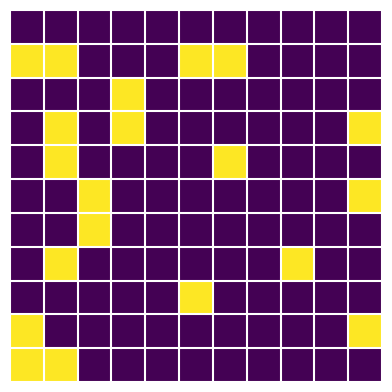

In [248]:
import matplotlib.pyplot as plt 
import time


img = plt.matshow(as_matrix(state, n), cmap="viridis")
img.axes.axis(False)
for pos in range(0,12):
    img.axes.axhline(y=pos-0.5, color="white")
    img.axes.axvline(x=pos-0.5, color="white")
img


In [170]:

def cgol_show(self):
    symbols = "\u2b1c\u2b1b"
    state = as_matrix([symbols[x] for x in self.state], self.n)
    return '\n'.join(''.join(line) for line in state)

ConwayGoL.__str__ = cgol_show
ConwayGoL.show = cgol_show

    

In [171]:
conway = ConwayGoL(state, 11)
print(conway)

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬛⬜⬜⬜⬛⬛⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜⬛
⬜⬛⬜⬜⬜⬜⬛⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬛
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛
⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜


A `step` metódushoz ki kellene számolni egy adott csúcs foglalt szomszédainak számát `cnt`. Ha ez kész,
akkor az $i$ csúcs új állapota:

$$
    \text{state}_{t+1}[i]=
    \begin{cases}
    1 &\text{Ha $\text{cnt}[i]\in\{2,3\}$ és $\text{state}_t[i]=1$}\\
    1 &\text{Ha $\text{cnt}[i]\in\{3\}$ és $\text{state}_t[i]=0$}\\
    0 &\text{különben}
    \end{cases}
$$

In [137]:
def newstate(state, count):
    return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

In [140]:
import ipytest 
ipytest.autoconfig()

In [143]:
%%ipytest

def test_newstate():
    res = [0]*9
    res[2] = 1
    res[3] = 1
    assert newstate([1]*9, list(range(9))) == res
    res = [0]*9
    res[3] = 1    
    assert newstate([0]*9, list(range(9))) == res


.                                                                                            [100%]
1 passed in 0.01s


In [153]:
def idx(i, d_row, d_col, n):
    i, j = divmod(i, n)
    i = (i+d_row) % n
    j = (j+d_col) % n
    return i*n+j

def count_neighbors(state, n):
    strides = [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)] 
    lens = len(state)
    return [sum(state[idx(i,di,dj,n)] for di, dj in strides) for i in range(lens)]

def cgol_step(self):
    count = count_neighbors(self.state, self.n)
    self.state = newstate(self.state, count)
    return self
    
ConwayGoL.step = cgol_step

In [154]:
@classmethod
def cgol_from_random_state(cls, n, p):
    return cls(random_state(n, p), n)

ConwayGoL.from_random_state=cgol_from_random_state

In [172]:
conway = ConwayGoL.from_random_state(4, 0.3)
print(conway)
print(as_matrix(count_neighbors(conway.state, conway.n), 4))

⬛⬜⬜⬜
⬜⬜⬜⬜
⬜⬛⬜⬛
⬜⬛⬛⬜
[[1, 3, 2, 2], [3, 2, 2, 2], [3, 2, 4, 1], [4, 3, 3, 3]]


In [155]:
conway = ConwayGoL.from_random_state(5, 0.5)
print(conway)
print("-"*20)
print(conway.step())

⬛⬛⬛⬜⬛
⬛⬜⬜⬜⬛
⬜⬛⬛⬜⬜
⬛⬜⬛⬛⬜
⬛⬜⬛⬛⬛
--------------------
⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬛
⬜⬜⬛⬜⬜
⬛⬜⬜⬜⬜
⬜⬜⬜⬜⬜


Tudunk-e valami animációszerűt készíteni? Jupyter notebook-ban pl. a következő képpen lehet: 

In [252]:
from ipywidgets import Output
from time import sleep

out = Output()
display(out)
conway = ConwayGoL.from_random_state(n=31, p=0.2)

for i in range(100):
    out.clear_output(True)
    with out:
        print(f"After {i} steps:\n{conway}")  
    sleep(0.2)
    conway.step()
    if conway.is_empty():
        break


Output()

Ha parancssorból dolgozunk, akkor valami ilyesmit lehetne tenni

In [213]:
%%writefile conway.py

import random

def as_matrix(lst, n):
    return [lst[i:i+n] for i in range(0, len(lst), n)]

def random_state(n, p):
    return [int(random.random()<p) for _ in range(n*n)]

def idx(i, d_row, d_col, n):
    i, j = divmod(i, n)
    i = (i+d_row) % n
    j = (j+d_col) % n
    return i*n+j

def count_neighbors(state, n):
    lens = len(state)
    strides = [(0,-1), (0, 1), (1,-1), (1,0), (1,1), (-1,-1), (-1,0), (-1,1)] 

    return [sum(state[idx(i, di, dj, n)] for di, dj in strides) for i in range(lens)]

def newstate(state, count):
    return [int((c==3)|((c==2) & (s==1))) for s, c in  zip(state, count)]

class ConwayGoL:
    symbols = "\u2b1c\u2b1b"
    
    def __init__(self, state, n):
        self.state = list(state)
        self.n = n
        assert len(state) == n*n

    def step(self):
        count = count_neighbors(self.state, self.n)
        self.state = newstate(self.state, count)
        return self

    def show(self):
        return str(self)
    
    def __str__(self): 
        symbols = self.symbols
        state = as_matrix([symbols[x] for x in self.state], self.n)
        return '\n'.join(''.join(line) for line in state)
        
    def __repr__(self):
        return f"{type(self).__name__}({state},{n})"
    
    @classmethod
    def from_random_state(cls, n, p):
        return cls(random_state(n, p), n)

    def is_empty(self):
        return not sum(self.state)

if __name__ == "__main__":
    from time import sleep
    n = 11
    p = 0.2
    conway = ConwayGoL.from_random_state(n, p)
    back_step_string = f"{chr(27)}[{n+1}A"
    nsteps = 10
    for i in range(nsteps+1):
        print(f"after {i} step:")
        print(conway)  
        sleep(0.2)
        conway.step()
        if conway.is_empty():
            break
        if i < nsteps:
            print(back_step_string, end="")
        


Overwriting conway.py


Ha valamit már megírtunk és szeretnénk használni, `import`-tal elérhető. Pl.

In [212]:
from conway import ConwayGoL